In [2]:
import pickle
import sys
import numpy as np

sys.path.append("../../src")
from config import Paths
import pandas as pd


In [5]:
import sys

sys.path.append("../../src")
from config import Paths
import pandas as pd

df = pd.read_csv(
    "/home/arau6/projects/wl-semsearch-poc-debug/data/spam_classifier/GradientBoostingClassifier/test_nino/20240402_21-24-50-773511/model_data.csv",
)

status
0    3500
1    2027
Name: count, dtype: int64


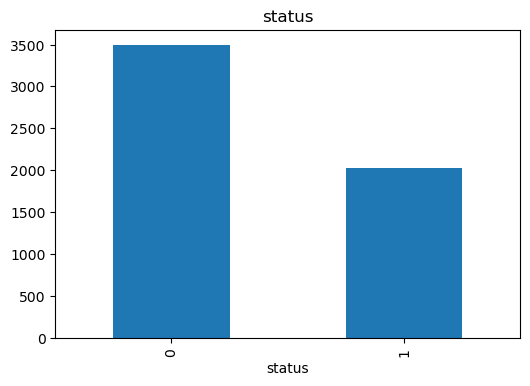

status                                                0    1
text                                                        
 - femte.til.venstre (5345035066)  Nogen af jer...  NaN  1.0
 - fwd_3lloqiqu (52903093277)     SALE . Flos -...  1.0  NaN
"100 Chef per una sera" a Vietri sul Mare per f...  NaN  1.0
"100 Chef per una sera", appuntamento a Vietri ...  NaN  1.0
"Bozen-Krimi" und "RESET" – die TV-Tipps am Don...  1.0  NaN
...                                                 ...  ...
🔷Danish Design Classics🔷 - danish.design.classi...  1.0  NaN
🔷Danish Design Classics🔷 - danish.design.classi...  NaN  1.0
🔷Danish Design Classics🔷 - danish.design.classi...  NaN  1.0
🔷Danish Design Classics🔷 - danish.design.classi...  NaN  1.0
🔷Danish Design Classics🔷 - danish.design.classi...  1.0  NaN

[4734 rows x 2 columns]


In [7]:
import matplotlib.pyplot as plt

feature_column = "text"
target_column = "status"

# Plot the data by 'Stato Workflow'
column_counts = df[target_column].value_counts()
print(column_counts)
column_counts.plot(kind='bar', figsize=(6, 4))
plt.title(target_column)
plt.show()

# Partition the data by 'Argomento' and display a table
partitioned_data = df.groupby(feature_column)[target_column].value_counts().unstack()
print(partitioned_data)

# Calculate the number of rows and columns for the subplots
num_rows = (len(partitioned_data) + 3) // 4
num_cols = min(len(partitioned_data), 4)

# Plot a pie chart for each 'Argomento'
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 12))

# Iterate over the partitioned data and plot the pie charts
for i, (argomento, data) in enumerate(partitioned_data.iterrows()):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    data.plot.pie(ax=ax, autopct='%1.1f%%')
    ax.legend(title=target_column, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

In [5]:
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_val_score

input_feature = "text"
target_variable = "status"

# Split the data into input features (X) and target variable (y)
X = df[input_feature]
y = df[target_variable]

# Modify the pipeline to include the to_dense transformer
pipeline = Pipeline(
    [
        ("vect", CountVectorizer()),
        ("tfidf", TfidfTransformer()),
        # ("to_dense", to_dense),
        ("clf", GradientBoostingClassifier()),
    ]
)

# Define the metrics you want to evaluate
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform k-fold cross-validation and calculate the scores
# scores = cross_validate(pipeline, X, y, cv=2, scoring=scoring, verbose=2, n_jobs=1)


# Print the scores for each metric
# for metric in scoring:
    # print(f"{metric}: {scores['test_'+metric].mean():.2f} (std: {scores['test_'+metric].std():.2f})")

pipeline.fit(X, y)


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', GradientBoostingClassifier())])

In [43]:
import time
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.pipeline import FeatureUnion, FunctionTransformer, Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.preprocessing import FunctionTransformer

to_dense = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)
argomento_names = partitioned_data.index.tolist()

# features = FeatureUnion(
#     [
#         (
#             "text_features",
#             Pipeline(
#                 [
#                     ("vect", CountVectorizer()),
#                     ("tfidf", TfidfTransformer()),
#                 ]
#             ),
#         ),
#         (
#             "lang_feature",
#             FunctionTransformer(lambda x: x["Lang"].values.reshape(-1, 1), validate=False)
#         ),
#     ]
# )

features = (
    "text_features",
    Pipeline(
        [
            ("vect", CountVectorizer()),
            ("tfidf", TfidfTransformer()),
        ]
    ),
)


def buildPipelineFor(classifier) -> Pipeline:
    pipeline = None
    if (
        isinstance(clf, GaussianProcessClassifier)
        or isinstance(clf, GaussianNB)
        or isinstance(clf, QuadraticDiscriminantAnalysis)
        or isinstance(clf, LinearDiscriminantAnalysis)
    ):
        pipeline = Pipeline(
            [
                ("vect", CountVectorizer()),
                ("tfidf", TfidfTransformer()),
                ("to_dense", to_dense),
                ("clf", clf),
            ]
        )
    else:
        pipeline = Pipeline(
            [
                ("vect", CountVectorizer()),
                ("tfidf", TfidfTransformer()),
                ("clf", clf),
            ]
        )
    return pipeline


classifiers = [
    GradientBoostingClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    SVC(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    LogisticRegression(random_state=42),
    LinearDiscriminantAnalysis(),
    ExtraTreesClassifier(n_jobs=-1, random_state=42),
    SGDClassifier(random_state=42),
]


datasets = {
    25: {},
    50: {},
    100: {},
    200: {},
    500: {},
    750: {},
    1000: {},
}

# TODO: 1. For each dataset for each Argomento:
# fit/test
# EXPORT in csv results adding an argomento field
#  TODO: 2. ADD Lang as input feature

# create balanced X_train and y_train for each Argomento
for key in datasets.keys():
    # create one classifier per argomento
    for argomento in argomento_names:
        # filter df by argomento
        df_argomento = df[df["Argomento"].str.contains(argomento)]

        # NOT ENOUGH DATA
        if key * 2 > df_argomento.shape[0]:
            datasets[key][argomento] = None
            continue

        class_Y = df_argomento[df_argomento["Stato Workflow"] == 1]
        class_D = df_argomento[df_argomento["Stato Workflow"] == 0]

        sampled_Y = class_Y.sample(int(key / 2), random_state=42)
        sampled_D = class_D.sample(int(key / 2), random_state=42)

        # Concatenate the results
        balanced_train = pd.concat([sampled_Y, sampled_D])
        # balanced_X_train = balanced_train[["text", "Lang"]]
        balanced_X_train = balanced_train["text"]
        balanced_y_train = balanced_train["Stato Workflow"]

        df_test = df_argomento[~df_argomento["id"].isin(balanced_train["id"])]

        X_test = df_test["text"]
        y_test = df_test["Stato Workflow"]

        # use balanced X train
        datasets[key][argomento] = [balanced_X_train, X_test, balanced_y_train, y_test]

# for key in datasets.keys():
#     for argomento in datasets[key].keys():
#         df_list = datasets[key][argomento]
#         df_list[0].to_csv(f"{key}-{argomento}-X_train.csv", index=False)
#         df_list[1].to_csv(f"{key}-{argomento}-X_test.csv", index=False)
#         df_list[2].to_csv(f"{key}-{argomento}-y_train.csv", index=False)
#         df_list[3].to_csv(f"{key}-{argomento}-y_test.csv", index=False)


cms = {}
accuracies = {}
fit_times = {}
prediction_times = {}


# Create a FunctionTransformer to convert sparse matrices to dense ones
to_dense = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)


# Create pipelines
for clf in classifiers:
    # Create a separate pipeline for the classifiers needing dense vectors
    pipeline = buildPipelineFor(classifier=clf)

    for key in datasets.keys():
        for argomento in argomento_names:
            # NOT enough data!
            if datasets[key][argomento] == None:
                continue
            
            model_name = (
                f"{argomento}-{key}-{clf.__class__.__name__}-{clf.get_params()}"
            )
            X_train = datasets[key][argomento][0]
            X_test = datasets[key][argomento][1]
            y_train = datasets[key][argomento][2]
            y_test = datasets[key][argomento][3]

            print("***************************************************************")
            print(f"Evaluating model {model_name}...")
            try:
                start_time = time.time()
                pipeline.fit(X_train, y_train)
                fit_time = time.time() - start_time
                fit_times[model_name] = fit_time

                start_time = time.time()
                y_pred = pipeline.predict(X_test)
                prediction_time = time.time() - start_time
                prediction_times[model_name] = prediction_time

                cm = confusion_matrix(y_test, y_pred)
                cms[model_name] = cm

                accuracy = accuracy_score(y_test, y_pred)
                accuracies[model_name] = accuracy

                print(f"{model_name}")
                print(f"{accuracy:.2f}")
                print(
                    "***************************************************************\n\n"
                )
            except Exception as e:
                print(f"An error occurred: {str(e)}")

import pickle

# Save the dictionaries to a file
with open(f"results_{lang}.pkl", "wb") as file:
    pickle.dump(cms, file)
    pickle.dump(accuracies, file)
    pickle.dump(fit_times, file)
    pickle.dump(prediction_times, file)

***************************************************************
Evaluating model ARTEMIDE-25-GradientBoostingClassifier-{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}...
ARTEMIDE-25-GradientBoostingClassifier-{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 

In [ ]:
for model_name, accuracy in accuracies.items():
    print(model_name)
    print(f"{accuracy:.2f}")
    print(f"{cms[model_name]}")
    print(f"fit_time: {fit_times[model_name]:.2f}")
    print(f"prediction_time: {prediction_times[model_name]:.2f}")
    print()


In [4]:
# load the pickle file as a pipeline object
with open("/home/arau6/projects/wl-semsearch-poc-debug/data/spam_classifier/GradientBoostingClassifier/test_nino/20240402_21-24-50-773511/training/trained_model.pickle", "rb") as file:
    pipeline = pickle.load(file)

pipeline

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', GradientBoostingClassifier())])

In [7]:
# load the first text from the dataframe df and predict its class
df_status_0 = df[df["status"] == 0]
df_status_1 = df[df["status"] == 1]

# sanity check to see if the pipeline is working. Load 10 texts with 0 and 10 texts with 1 from the dataframe df and predict their classes and compare with the expected classes
for i in range(10):
    status = df_status_0["status"].iloc[i]
    text = df_status_0["text"].iloc[i]
    predicted = pipeline.predict([text])
    print(f"predicted: {predicted[0]}; expected: {status}; text: {text}")

for i in range(10):
    status = df_status_1["status"].iloc[i]
    text = df_status_1["text"].iloc[i]
    predicted = pipeline.predict([text])
    print(f"predicted: {predicted[0]}; expected: {status}; text: {text}")



features = {
    "text": "52168725467 - 52168725467 (52168725467) Ahány ember, annyi ízlés.😊. . N̲e̲k̲t̲e̲k̲ m̲e̲l̲y̲i̲k̲ h̲á̲l̲ó̲s̲z̲o̲b̲a̲ l̲á̲m̲p̲a̲ t̲e̲t̲s̲z̲i̲k̲ j̲o̲b̲b̲a̲n̲?̲. 𝗔: a minimál designos. 𝗕: a látványos függelékes . . 💡𝓛𝓾𝓶𝓸𝓵𝓲𝓰𝓱𝓽 - Nálunk nem csak lámpát találsz, hanem megoldást is!💡. www.lumolightdesign.hu. . #lumolight #lumolightdesign #lampabolt #vilagitastechnika #vilagitas #tippek #LED #ledlampak #interior #inspiration #modernotthon #lakberendezés #lodes #elstead #elsteadlighting. ",
}

# transform the input feature values to a single string
text_input_feature = "\n".join(features.values())

print(f"text_input_feature: {text_input_feature}")

# predict the class and the probabilities
# predicted = pipeline.predict([text_input_feature])
# print(f"predicted: {predicted[0]}")
probabilities = pipeline.predict_proba([text_input_feature])
print(f"probabilities: {probabilities}")


# Get the index of the maximum confidence score
best_class_index = np.argmax(probabilities[0])

# Get the confidence score of the best class

best_class_confidence = str(probabilities[0][best_class_index])
best_class_label = "ham" if best_class_index == 1 else "spam"


print(f"Best class: {best_class_label}")
print(f"Confidence: {best_class_confidence}")


# predicted = pipeline.predict([";';!@#$$"])
# print(predicted)

predicted: 0; expected: 0; text: Chapter 25: The Dragon Speaks of the Past - The Ballad Of A Semi-Benevolent Dragon Chapter 25: The Dragon Speaks of the Past - The Ballad Of A Semi-Benevolent Dragon Harald breathed a sigh of relief when the titanic shadow on the horizon turned out to be Doomwing. He doubted that any dragon would dare to enter Doomwing's (...). Harald breathed a sigh of relief when the titanic shadow on the horizon turned out to be Doomwing. He doubted that any dragon would dare to enter Doomwing's (...) Remove. Harald breathed a sigh of relief when the titanic shadow on the horizon turned out to be Doomwing. He doubted that any dragon would dare to enter Doomwing's territory uninvited, but it was still a relief to know that they weren't in any danger. The Stalwart Guard had many weapons, but none that could contend with a dragon a mile long.. "So… this is the place you have chosen?" Doomwing asked. The dragon had chosen to remain airborne rather than rest his weight up